In [1]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import medical_lib as ml
import pandas as pd
import numpy as np
import math
import warnings
import sys
from sklearn.utils import multiclass
warnings.filterwarnings("ignore")

Einlesen der Daten

In [2]:
intervalle = [(-520, -200),(-199, 0),(1, 14),(15, 30),(31, 60),(61,90),(91,120),(121,180),(181,365),(366,850),(851,1650)]
print(intervalle)
medDatamodel2 = pd.read_csv(
    'model2_Classificationtable_intervalstatus_v2.csv') #model2_Classificationtable_intervalstatus_v2_TMP
medDataCopy_model2 = medDatamodel2.copy()
medDataCopy_model2 = medDataCopy_model2.iloc[:, 3:]
medDataCopy_model2_Features_Selected = medDataCopy_model2.copy()

#################################################################################################
med_class_model2 = medDataCopy_model2.iloc[:, -1]

med_features_model2 = medDataCopy_model2.iloc[:, :-1]

###########################################################################################################################
###########################################################################################################################
# Aufteilen der Daten in 4 Untersets
med_features_train_model2, med_features_test_model2, med_class_train_model2, med_class_test_model2 = train_test_split(
    med_features_model2, med_class_model2, test_size=0.2, random_state=43, stratify=med_class_model2)
med_class_test_array = np.array(med_class_test_model2)
result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

[(-520, -200), (-199, 0), (1, 14), (15, 30), (31, 60), (61, 90), (91, 120), (121, 180), (181, 365), (366, 850), (851, 1650)]


KNN

In [3]:
medKNN = KNeighborsClassifier(n_neighbors=4)
# Training
medKNN.fit(med_features_train_model2, med_class_train_model2)
knnYpred = medKNN.predict(med_features_test_model2)
accuracyKNN = accuracy_score(knnYpred, med_class_test_array)
precisionKNN = precision_score(knnYpred, med_class_test_array, average='weighted')
recallKNN = recall_score(knnYpred, med_class_test_array, average='weighted')
f1scoreKNN = f1_score(knnYpred, med_class_test_array, average='weighted')
print('K: ', 4, 'KNN Accuracy: ', accuracyKNN, 'KNN Precision: ',
      precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN)
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 12:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', np.mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))

K:  4 KNN Accuracy:  0.4713216957605985 KNN Precision:  0.5466714180697057 KNN Recall:  0.4713216957605985 KNN F1-Score:  0.5022924655990965
Tatsächlich:  0.6234413965087282 0.6330935251798561 0.46808510638297873 0.5382262996941896
Durchschnittliche Abweichung:  1.4164588528678304
Standartabweichung der Abweichung:  1.7524129226011296


KNN: Übertragen der Daten

In [4]:
index = result.index[result['Modellierung'] == 'Model_2_version_2'].tolist()
result.at[index, 'KNN_precision'] = precisionknn
result.at[index, 'KNN_recall'] = recallknn
result.at[index, 'KNN_f1'] = f1scoreknn
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungknn)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Logistic Regression')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Logistic Regression

In [5]:
lr_model = LogisticRegression(solver='newton-cg', multi_class='multinomial')
lr_model.fit(med_features_train_model2, med_class_train_model2)
lr_y_pred = lr_model.predict(med_features_test_model2)
lr_accuracyLogReg = accuracy_score(lr_y_pred, med_class_test_array)
lr_precisionLogReg = precision_score(
    lr_y_pred, med_class_test_array, average='weighted')
lr_recallLogReg = recall_score(
    lr_y_pred, med_class_test_array, average='weighted')
lr_f1scoreLogReg = f1_score(lr_y_pred, med_class_test_array, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg,
      'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg)
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 12:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', np.mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))

Log-Regression Accuracy:  0.5411471321695761 Log-Regression Precision:  0.761544807025041 Log-Regression Recall:  0.5411471321695761 Log-Regression F1-Score:  0.6208401355097569
Tatsächlich:  0.6408977556109726 0.775 0.32978723404255317 0.46268656716417905
Durchschnittliche Abweichung:  1.1296758104738154
Standartabweichung der Abweichung:  1.559506970059526


Logistic Regression: Übertragen der Daten

In [6]:
index = result.index[result['Modellierung'] == 'Model_2_version_2'].tolist()
result.at[index, 'Logistic_Regression_precision'] = precisionlr
result.at[index, 'Logistic_Regression_recall'] = recalllr
result.at[index, 'Logistic_Regression_f1'] = f1scorelr
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichunglr)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Logistic Regression')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Decision Tree:

In [7]:
medical_DecTree = DecisionTreeClassifier(random_state=17)
medical_DecTree = medical_DecTree.fit(
    med_features_train_model2, med_class_train_model2)
decTree_pred = medical_DecTree.predict(med_features_test_model2)
accuracyDecTree = accuracy_score(decTree_pred, med_class_test_array)
precisionDecTree = precision_score(
    decTree_pred, med_class_test_array, average='weighted')
recallDecTree = recall_score(
    decTree_pred, med_class_test_array, average='weighted')
f1scoreDecTree = f1_score(decTree_pred, med_class_test_array, average='weighted')
print('Decision Tree: ', 'medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ',
      precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree)
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 12:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', np.mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))

Decision Tree:  medical_DecTree Accuracy:  0.4538653366583541 DecTree Precision:  0.46296679799191126 DecTree Recall:  0.4538653366583541 DecTree F1-Score:  0.4582374246917375
Tatsächlich:  0.6184538653366584 0.5935828877005348 0.5904255319148937 0.592
Durchschnittliche Abweichung:  1.254364089775561
Standartabweichung der Abweichung:  1.4948413896319703


Decision Tree: Übertragen der Daten

In [8]:
index = result.index[result['Modellierung'] == 'Model_2_version_2'].tolist()
result.at[index, 'Decision_Tree_precision'] = precisiondc
result.at[index, 'Decision_Tree_recall'] = recalldc
result.at[index, 'Decision_Tree_f1'] = f1scoredc
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungdc)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Decision Tree')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Random Forest

In [9]:
medical_RF = RandomForestClassifier(
    n_estimators=100, random_state= 20)
medical_RF.fit(med_features_train_model2, med_class_train_model2)
rfPred = medical_RF.predict(med_features_test_model2)
accuracyRF = accuracy_score(rfPred, med_class_test_array)
precisionRF = precision_score(rfPred, med_class_test_array, average='weighted')
recallRF = recall_score(rfPred, med_class_test_array, average='weighted')
f1scoreRF = f1_score(rfPred, med_class_test_array, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ',
      precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF)
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 12:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', np.mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))

Anzahl Estimator: 100  RF Accuracy:  0.5685785536159601 RF Precision:  0.8551285897986162 RF Recall:  0.5685785536159601 RF F1-Score:  0.6712728593695214
Tatsächlich:  0.6408977556109726 0.8666666666666667 0.2765957446808511 0.4193548387096774
Durchschnittliche Abweichung:  1.0947630922693268
Standartabweichung der Abweichung:  1.5346366774923152


Random Forest: Übertragen der Daten

In [10]:
index = result.index[result['Modellierung'] == 'Model_2_version_2'].tolist()
result.at[index, 'Random_Forest_precision'] = precisionrf
result.at[index, 'Random_Forest_recall'] = recallrf
result.at[index, 'Random_Forest_f1'] = f1scorerf
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungrf)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Random Forest')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

ADABoost

In [11]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model2, med_class_train_model2)
adamodel_prediction = adamodel.predict(med_features_test_model2)
adamodel_accuracy = accuracy_score(med_class_test_model2, adamodel_prediction)
adamodel_precision = precision_score(
    med_class_test_model2, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(
    med_class_test_model2, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model2,
                       adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy, 'Precision: ',
      adamodel_precision, 'Recall: ', adamodel_recall, 'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 12:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', np.mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))

ADABOOST:  Accuracy:  0.5311720698254364 Precision:  0.35252191349983253 Recall:  0.5311720698254364 f1-Score:  0.42182163905228504
Tatsächlich:  0.6209476309226932 0.7727272727272727 0.2712765957446808 0.4015748031496063
Durchschnittliche Abweichung:  1.167082294264339
Standartabweichung der Abweichung:  1.555142291510206


ADABoost: Übertragen der Daten

In [12]:
index = result.index[result['Modellierung'] == 'Model_2_version_2'].tolist()
result.at[index, 'ADABoost_precision'] = precisionada
result.at[index, 'ADABoost_recall'] = recallada
result.at[index, 'ADABoost_f1'] = f1scoreada
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungada)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: ADABoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

XGBoost

In [13]:
xgmodel = XGBClassifier(eval_metric='mlogloss')
xgmodel.fit(med_features_train_model2, med_class_train_model2)
xgboosted_prediction = xgmodel.predict(med_features_test_model2)
xgboosted_accuracy = accuracy_score(
    med_class_test_model2, xgboosted_prediction)
xgboosted_precision = precision_score(
    med_class_test_model2, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(
    med_class_test_model2, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model2,
                        xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ',
      xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 12:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)

accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', np.mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))

XGBOOST:  Accuracy:  0.5685785536159601 Precision:  0.5042785727402289 Recall:  0.5685785536159601 F1-Score:  0.5043148214256882
Tatsächlich:  0.6783042394014963 0.7864077669902912 0.4308510638297872 0.5567010309278351
Durchschnittliche Abweichung:  1.0698254364089776
Standartabweichung der Abweichung:  1.5408363889484185


XGBoost: Übertragen der Daten

In [14]:
index = result.index[result['Modellierung'] == 'Model_2_version_2'].tolist()
result.at[index, 'XGBoost_precision'] = precisionxg
result.at[index, 'XGBoost_recall'] = recallxg
result.at[index, 'XGBoost_f1'] = f1scorexg
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungxg)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: XGBoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

XGBoost: Featureranking nach gain:

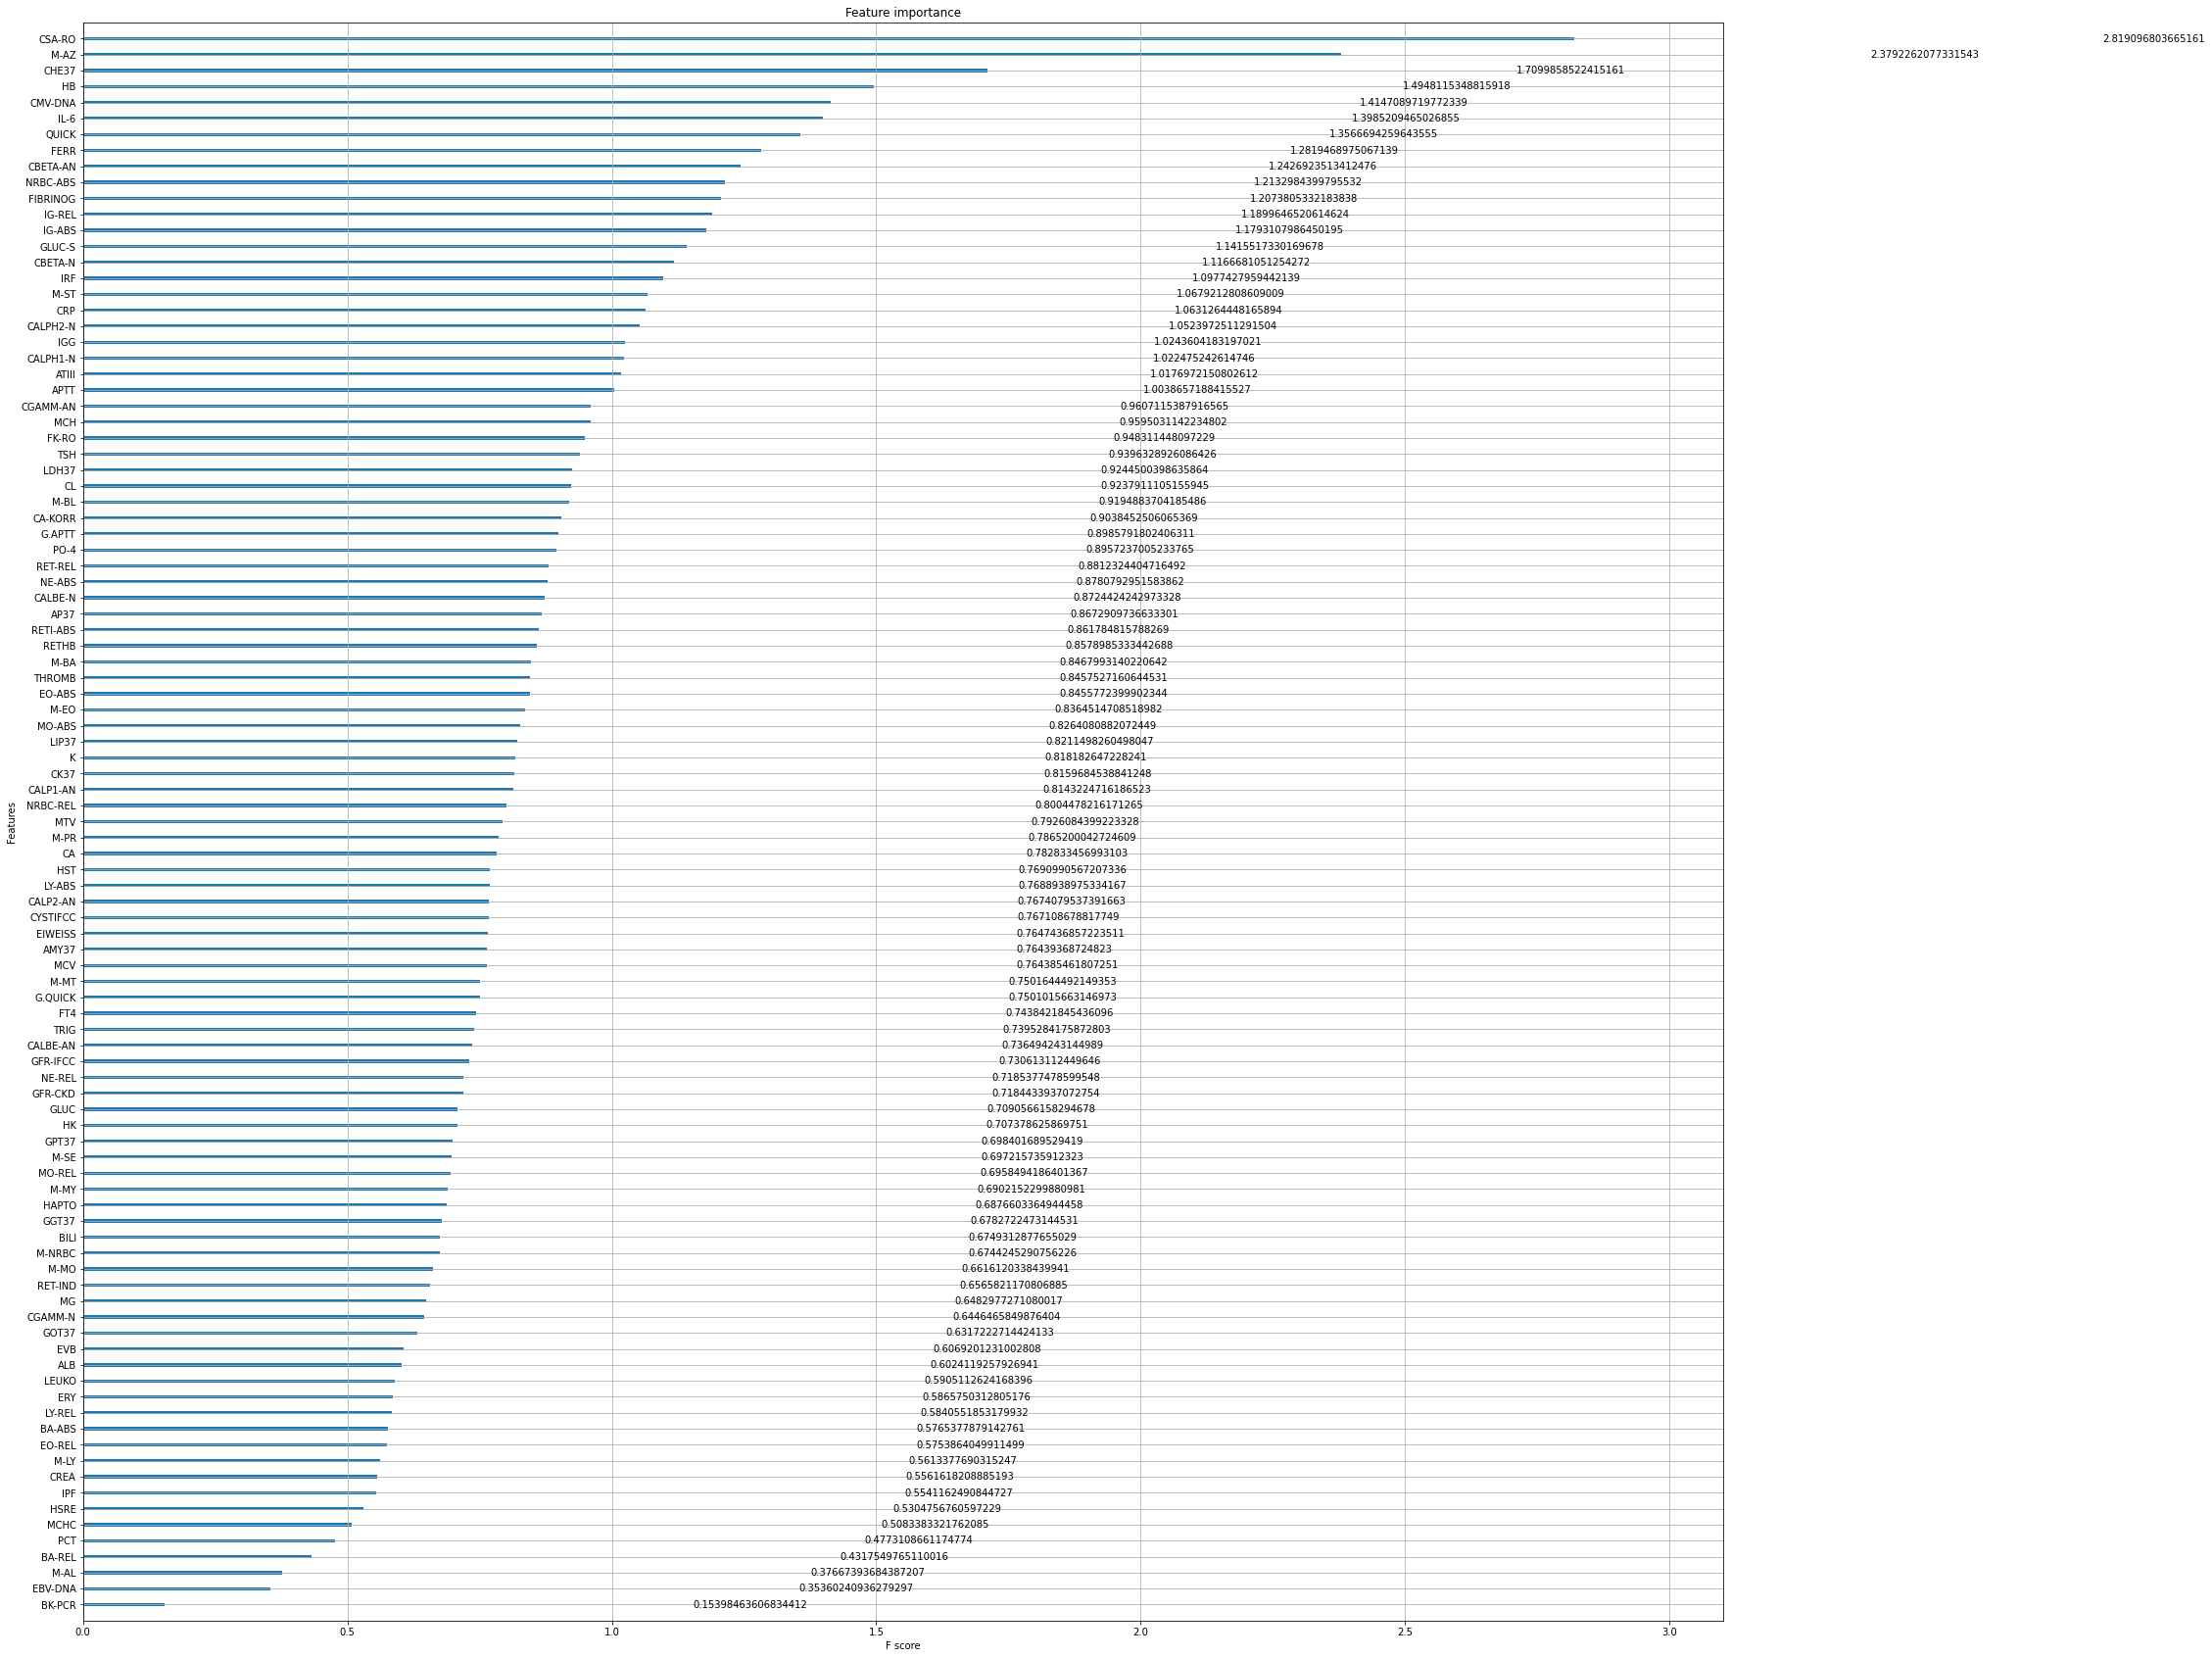

In [15]:
featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type= 'gain').items())
pyplot.rcParams['figure.figsize'] = [30,30]
plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
pyplot.show()
newfeatures = []
for i in range(len(featureranking)):
    if featureranking[i][0] < 1.0:
        newfeatures.append(featureranking[i][1])
# # print(newfeatures)

for el in newfeatures:
    medDataCopy_model2.drop(el, inplace=True, axis=1)
  
medDataCopy_model2.to_csv('model2_Classificationtable_intervalstatus_v2_selection.csv')

Nach Feature-Selection: Einlesen der neuen Daten

In [16]:
intervalle = [(-520, -200),(-199, 0),(1, 14),(15, 30),(31, 60),(61,90),(91,120),(121,180),(181,365),(366,850),(851,1650)]
print(intervalle)
medDatamodel2 = pd.read_csv(
    'model2_Classificationtable_intervalstatus_v2_selection.csv') #model2_Classificationtable_intervalstatus_v2_TMP
medDataCopy_model2 = medDatamodel2.copy()
medDataCopy_model2 = medDataCopy_model2.iloc[:, 1:]
medDataCopy_model2_Features_Selected = medDataCopy_model2.copy()

#################################################################################################
med_class_model2 = medDataCopy_model2.iloc[:, -1]

med_features_model2 = medDataCopy_model2.iloc[:, :-1]

###########################################################################################################################
###########################################################################################################################
# Aufteilen der Daten in 4 Untersets
med_features_train_model2, med_features_test_model2, med_class_train_model2, med_class_test_model2 = train_test_split(
    med_features_model2, med_class_model2, test_size=0.2, random_state=43, stratify=med_class_model2)
med_class_test_array = np.array(med_class_test_model2)
result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

[(-520, -200), (-199, 0), (1, 14), (15, 30), (31, 60), (61, 90), (91, 120), (121, 180), (181, 365), (366, 850), (851, 1650)]


KNN

In [17]:
medKNN = KNeighborsClassifier(n_neighbors=4)
# Training
medKNN.fit(med_features_train_model2, med_class_train_model2)
knnYpred = medKNN.predict(med_features_test_model2)
accuracyKNN = accuracy_score(knnYpred, med_class_test_array)
precisionKNN = precision_score(knnYpred, med_class_test_array, average='weighted')
recallKNN = recall_score(knnYpred, med_class_test_array, average='weighted')
f1scoreKNN = f1_score(knnYpred, med_class_test_array, average='weighted')
print('K: ', 4, 'KNN Accuracy: ', accuracyKNN, 'KNN Precision: ',
      precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN)
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 12:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', np.mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
index = result.index[result['Modellierung'] == 'Model_2_version_2_selected'].tolist()
result.at[index, 'KNN_precision'] = precisionknn
result.at[index, 'KNN_recall'] = recallknn
result.at[index, 'KNN_f1'] = f1scoreknn
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungknn)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Logistic Regression')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

K:  4 KNN Accuracy:  0.45885286783042395 KNN Precision:  0.5351035870557148 KNN Recall:  0.45885286783042395 KNN F1-Score:  0.4908385621996669
Tatsächlich:  0.6134663341645885 0.6187050359712231 0.4574468085106383 0.5259938837920489
Durchschnittliche Abweichung:  1.4214463840399003
Standartabweichung der Abweichung:  1.7780706018267218


Logistic Regression

In [18]:
lr_model = LogisticRegression(solver='newton-cg', multi_class='multinomial')
lr_model.fit(med_features_train_model2, med_class_train_model2)
lr_y_pred = lr_model.predict(med_features_test_model2)
lr_accuracyLogReg = accuracy_score(lr_y_pred, med_class_test_array)
lr_precisionLogReg = precision_score(
    lr_y_pred, med_class_test_array, average='weighted')
lr_recallLogReg = recall_score(
    lr_y_pred, med_class_test_array, average='weighted')
lr_f1scoreLogReg = f1_score(lr_y_pred, med_class_test_array, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg,
      'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg)
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 12:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', np.mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
index = result.index[result['Modellierung'] == 'Model_2_version_2_selected'].tolist()
result.at[index, 'Logistic_Regression_precision'] = precisionlr
result.at[index, 'Logistic_Regression_recall'] = recalllr
result.at[index, 'Logistic_Regression_f1'] = f1scorelr
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichunglr)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Logistic Regression')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Log-Regression Accuracy:  0.5236907730673317 Log-Regression Precision:  0.7675393781870548 Log-Regression Recall:  0.5236907730673317 Log-Regression F1-Score:  0.6165419783873649
Tatsächlich:  0.6109725685785536 0.7162162162162162 0.28191489361702127 0.40458015267175573
Durchschnittliche Abweichung:  1.2244389027431422
Standartabweichung der Abweichung:  1.588456251749945


Decision Tree

In [19]:
medical_DecTree = DecisionTreeClassifier(random_state=17)
medical_DecTree = medical_DecTree.fit(
    med_features_train_model2, med_class_train_model2)
decTree_pred = medical_DecTree.predict(med_features_test_model2)
accuracyDecTree = accuracy_score(decTree_pred, med_class_test_array)
precisionDecTree = precision_score(
    decTree_pred, med_class_test_array, average='weighted')
recallDecTree = recall_score(
    decTree_pred, med_class_test_array, average='weighted')
f1scoreDecTree = f1_score(decTree_pred, med_class_test_array, average='weighted')
print('Decision Tree: ', 'medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ',
      precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree)
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 12:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', np.mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
index = result.index[result['Modellierung'] == 'Model_2_version_2_selected'].tolist()
result.at[index, 'Decision_Tree_precision'] = precisiondc
result.at[index, 'Decision_Tree_recall'] = recalldc
result.at[index, 'Decision_Tree_f1'] = f1scoredc
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungdc)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Decision Tree')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Decision Tree:  medical_DecTree Accuracy:  0.4488778054862843 DecTree Precision:  0.4641801016104353 DecTree Recall:  0.4488778054862843 DecTree F1-Score:  0.45557586079668877
Tatsächlich:  0.6109725685785536 0.5888888888888889 0.5638297872340425 0.5760869565217391
Durchschnittliche Abweichung:  1.3316708229426435
Standartabweichung der Abweichung:  1.5511943596847484


Random Forest

In [20]:
medical_RF = RandomForestClassifier(
    n_estimators=100, random_state= 20)
medical_RF.fit(med_features_train_model2, med_class_train_model2)
rfPred = medical_RF.predict(med_features_test_model2)
accuracyRF = accuracy_score(rfPred, med_class_test_array)
precisionRF = precision_score(rfPred, med_class_test_array, average='weighted')
recallRF = recall_score(rfPred, med_class_test_array, average='weighted')
f1scoreRF = f1_score(rfPred, med_class_test_array, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ',
      precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF)
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 12:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', np.mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
index = result.index[result['Modellierung'] == 'Model_2_version_2_selected'].tolist()
result.at[index, 'Random_Forest_precision'] = precisionrf
result.at[index, 'Random_Forest_recall'] = recallrf
result.at[index, 'Random_Forest_f1'] = f1scorerf
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungrf)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Random Forest')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Anzahl Estimator: 100  RF Accuracy:  0.5835411471321695 RF Precision:  0.8035486573036383 RF Recall:  0.5835411471321695 RF F1-Score:  0.6605036037645801
Tatsächlich:  0.6608478802992519 0.825 0.35106382978723405 0.49253731343283574
Durchschnittliche Abweichung:  1.0798004987531171
Standartabweichung der Abweichung:  1.5660411068133484


ADABoost

In [21]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model2, med_class_train_model2)
adamodel_prediction = adamodel.predict(med_features_test_model2)
adamodel_accuracy = accuracy_score(med_class_test_model2, adamodel_prediction)
adamodel_precision = precision_score(
    med_class_test_model2, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(
    med_class_test_model2, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model2,
                       adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy, 'Precision: ',
      adamodel_precision, 'Recall: ', adamodel_recall, 'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 12:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', np.mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
index = result.index[result['Modellierung'] == 'Model_2_version_2_selected'].tolist()
result.at[index, 'ADABoost_precision'] = precisionada
result.at[index, 'ADABoost_recall'] = recallada
result.at[index, 'ADABoost_f1'] = f1scoreada
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungada)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: ADABoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

ADABOOST:  Accuracy:  0.5336658354114713 Precision:  0.35736089561685896 Recall:  0.5336658354114713 f1-Score:  0.4256885209280273
Tatsächlich:  0.6234413965087282 0.7761194029850746 0.2765957446808511 0.40784313725490196
Durchschnittliche Abweichung:  1.174563591022444
Standartabweichung der Abweichung:  1.5567250525856204


XGBoost

In [22]:
xgmodel = XGBClassifier(eval_metric='mlogloss')
xgmodel.fit(med_features_train_model2, med_class_train_model2)
xgboosted_prediction = xgmodel.predict(med_features_test_model2)
xgboosted_accuracy = accuracy_score(
    med_class_test_model2, xgboosted_prediction)
xgboosted_precision = precision_score(
    med_class_test_model2, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(
    med_class_test_model2, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model2,
                        xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ',
      xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 12:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 12:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)

accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', np.mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
index = result.index[result['Modellierung'] == 'Model_2_version_2_selected'].tolist()
result.at[index, 'XGBoost_precision'] = precisionxg
result.at[index, 'XGBoost_recall'] = recallxg
result.at[index, 'XGBoost_f1'] = f1scorexg
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungxg)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: XGBoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

XGBOOST:  Accuracy:  0.5610972568578554 Precision:  0.49417263181301363 Recall:  0.5610972568578554 F1-Score:  0.5060453493842166
Tatsächlich:  0.6658354114713217 0.7596153846153846 0.42021276595744683 0.5410958904109588
Durchschnittliche Abweichung:  1.119700748129676
Standartabweichung der Abweichung:  1.601319876494792
